# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [4]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# VISUALIZE DATASET

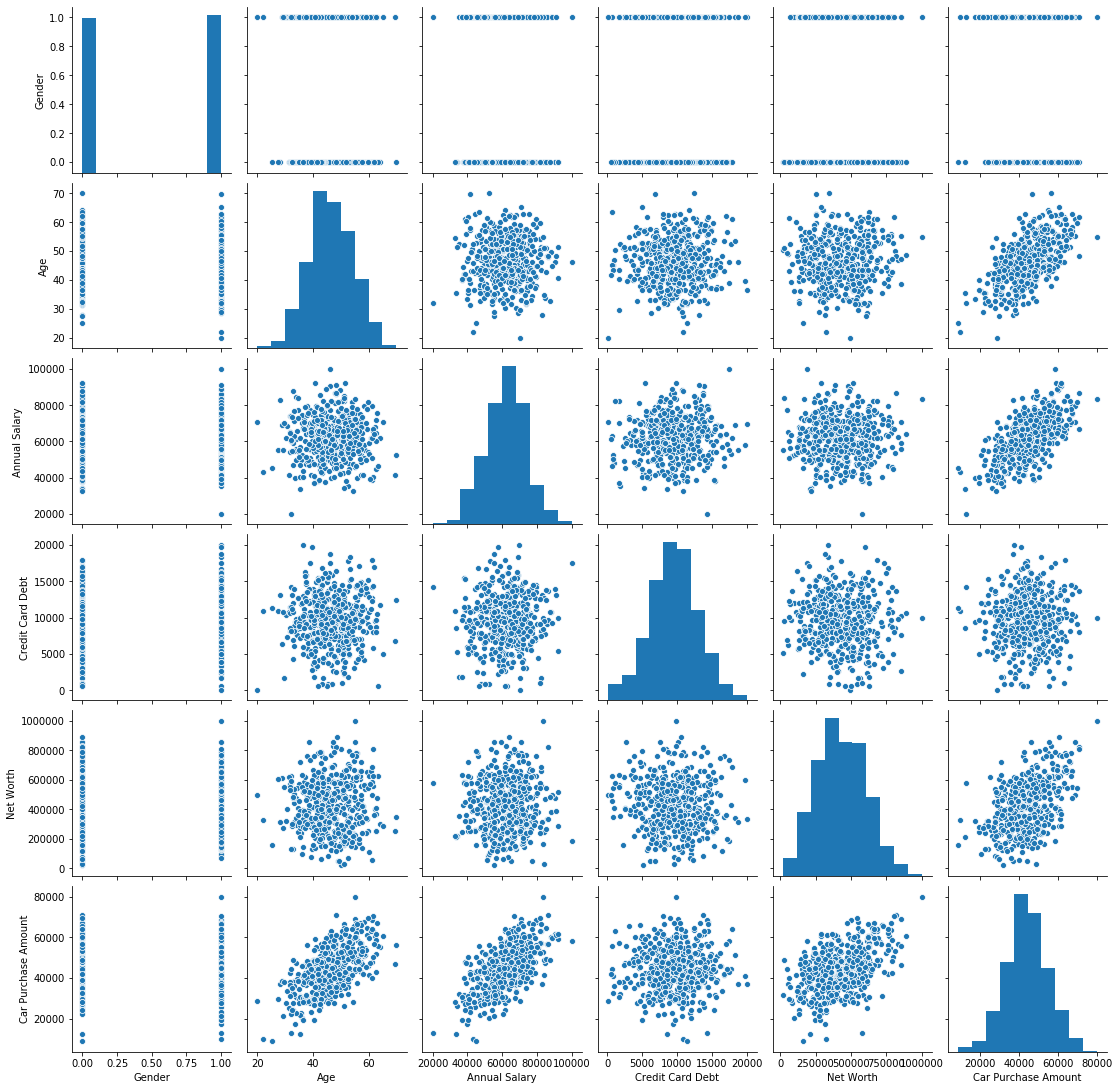

In [5]:
sns.pairplot(car_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [6]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [7]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [8]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)
X_scaled = scaler_x.fit_transform(X)


In [12]:
scaler_x.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [15]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [10]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [16]:
X_scaled.shape

(500, 5)

In [17]:
y.shape

(500,)

In [18]:
y = y.values.reshape(-1,1)

In [19]:
y.shape

(500, 1)

In [28]:
X_test.shape

(125, 5)

# TRAINING THE MODEL

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [44]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [46]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.2)


Train on 300 samples, validate on 75 samples
Epoch 1/100
300/300 [==============================] - 0s 248us/step - loss: 0.1979 - val_loss: 0.0506
Epoch 2/100
300/300 [==============================] - 0s 50us/step - loss: 0.0365 - val_loss: 0.0147
Epoch 3/100
300/300 [==============================] - 0s 55us/step - loss: 0.0157 - val_loss: 0.0219
Epoch 4/100
300/300 [==============================] - 0s 31us/step - loss: 0.0127 - val_loss: 0.0107
Epoch 5/100
300/300 [==============================] - 0s 50us/step - loss: 0.0088 - val_loss: 0.0079
Epoch 6/100
300/300 [==============================] - 0s 36us/step - loss: 0.0076 - val_loss: 0.0076
Epoch 7/100
300/300 [==============================] - 0s 47us/step - loss: 0.0063 - val_loss: 0.0066
Epoch 8/100
300/300 [==============================] - 0s 45us/step - loss: 0.0051 - val_loss: 0.0051
Epoch 9/100
300/300 [==============================] - 0s 37us/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/100
300/300 [==============

# EVALUATING THE MODEL 

In [50]:
print(epochs_hist.history.keys)


<built-in method keys of dict object at 0x000001D25E6B3C28>


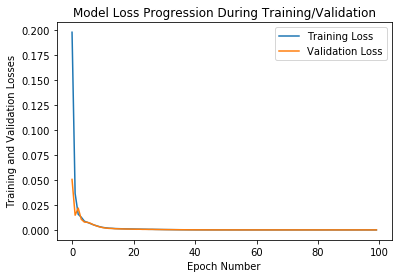

In [51]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [52]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 

y_predict = scaler_y.inverse_transform(model.predict(X_test))

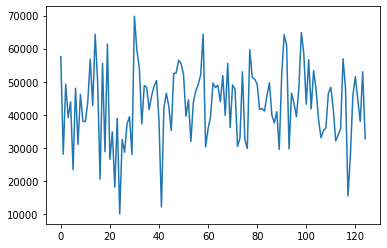

In [59]:
plt.plot(y_predict)


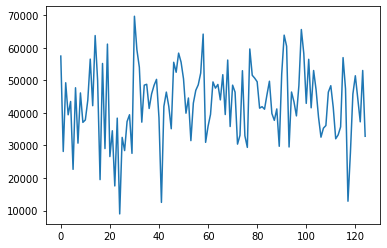

In [60]:
plt.plot(scaler_y.inverse_transform(y_test))

In [62]:
y_test = scaler_y.inverse_transform(y_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9975809755636368